<a href="https://colab.research.google.com/github/devdoe153/llm_voice/blob/main/audio_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
import torchaudio
import IPython.display as ipd



### 위상
- 파동의 한 주기에서 첫 시작점의 각도 혹은 한 시점의 위치
- 위상 변화는 파동의 시작점을 바꾸며, 이는 신호의 시간적 변동성에 영향을 미침

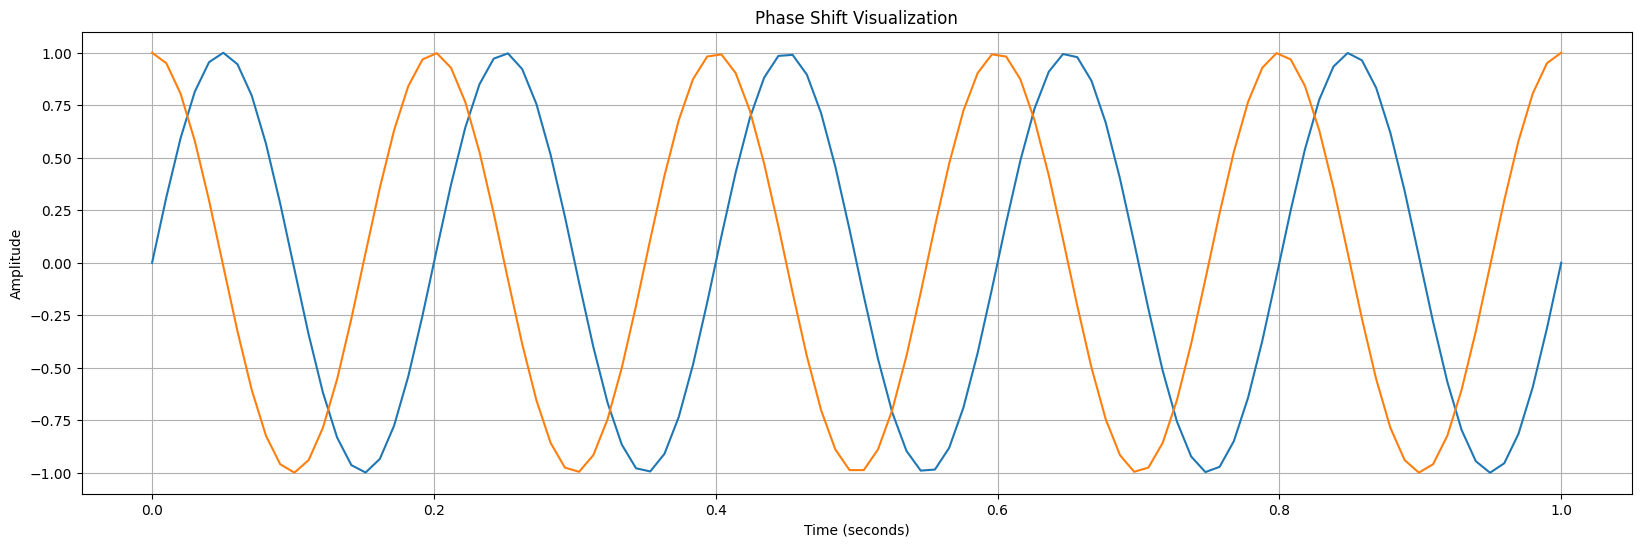

In [2]:
t = np.linspace(0, 1, 100)

frequency = 5

signal_1 = np.sin(2 * np.pi * frequency * t)
signal_2 = np.sin(2 * np.pi * frequency * t + np.pi/2)

plt.figure(figsize=(20, 6))
plt.plot(t, signal_1)
plt.plot(t, signal_2, label='phase = 90도')
plt.title("Phase Shift Visualization")
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### 진폭
- 파동의 주기에서 파동의 가운데로부터 최대로 움직인 값
- 진폭이 클 수록 파동의 최대 및 최소 값이 더 크게 나타나고, 이는 소리의 크기가 더 크다는 것을 의미

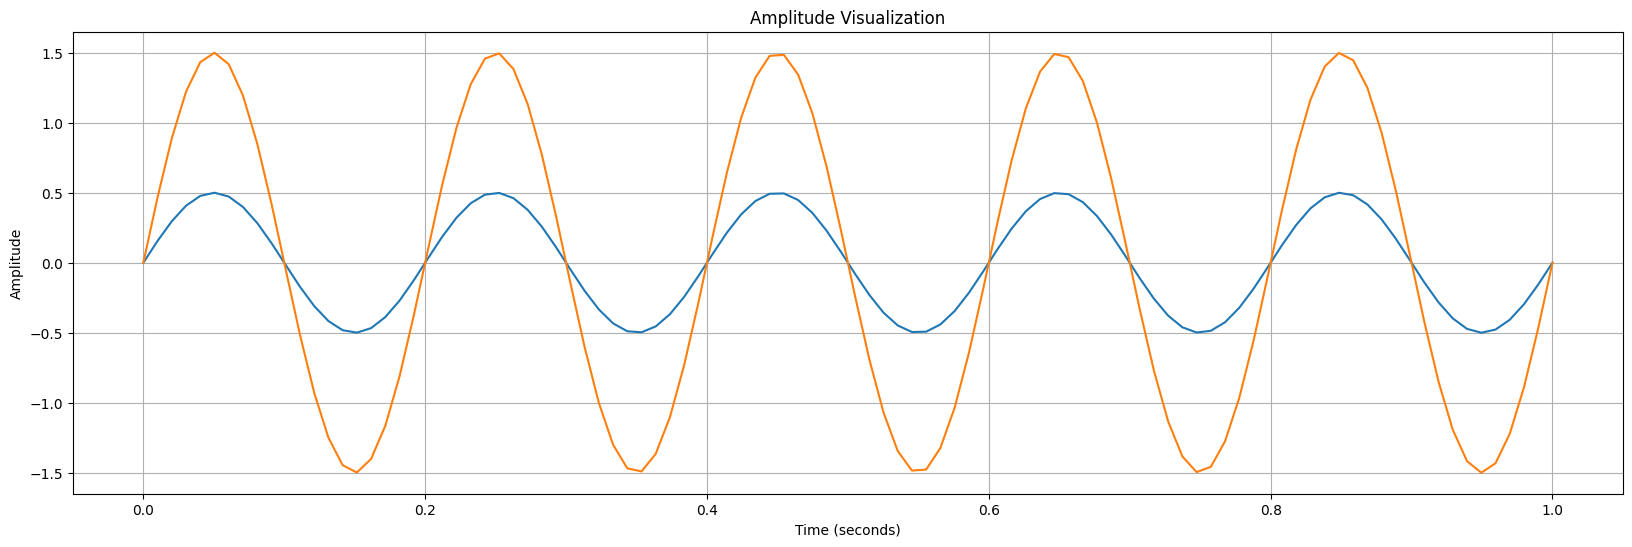

In [4]:
t = np.linspace(0, 1, 100)

frequency = 5

signal_1 = 0.5 * np.sin(2 * np.pi * frequency * t)
signal_2 = 1.5 * np.sin(2 * np.pi * frequency * t)

plt.figure(figsize=(20, 6))
plt.plot(t, signal_1, label='Amplitude = 0.5')
plt.plot(t, signal_2, label='Amplitude = 1.5')
plt.title("Amplitude Visualization")
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### 주파수
- 단위 시간당 파동이 반복되는 횟수(단위:Hz)
- 주파수가 높을수록 소리가 높게 들리고, 낮을수록 낮게 들림

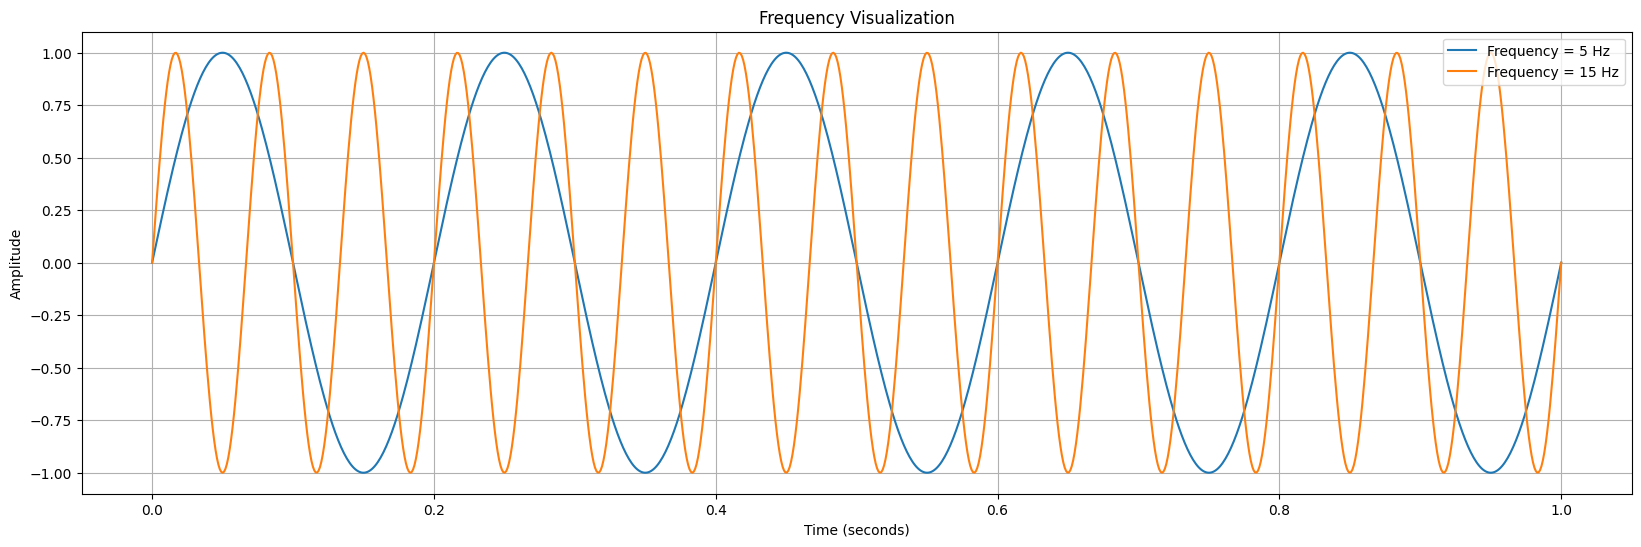

In [5]:
t = np.linspace(0, 1, 1000)

signal_1 = np.sin(2 * np.pi * 5 * t)
signal_2 = np.sin(2 * np.pi * 15 * t)

plt.figure(figsize=(20, 6))
plt.plot(t, signal_1, label='Frequency = 5 Hz')
plt.plot(t, signal_2, label='Frequency = 15 Hz')
plt.title("Frequency Visualization")
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### 샘플링


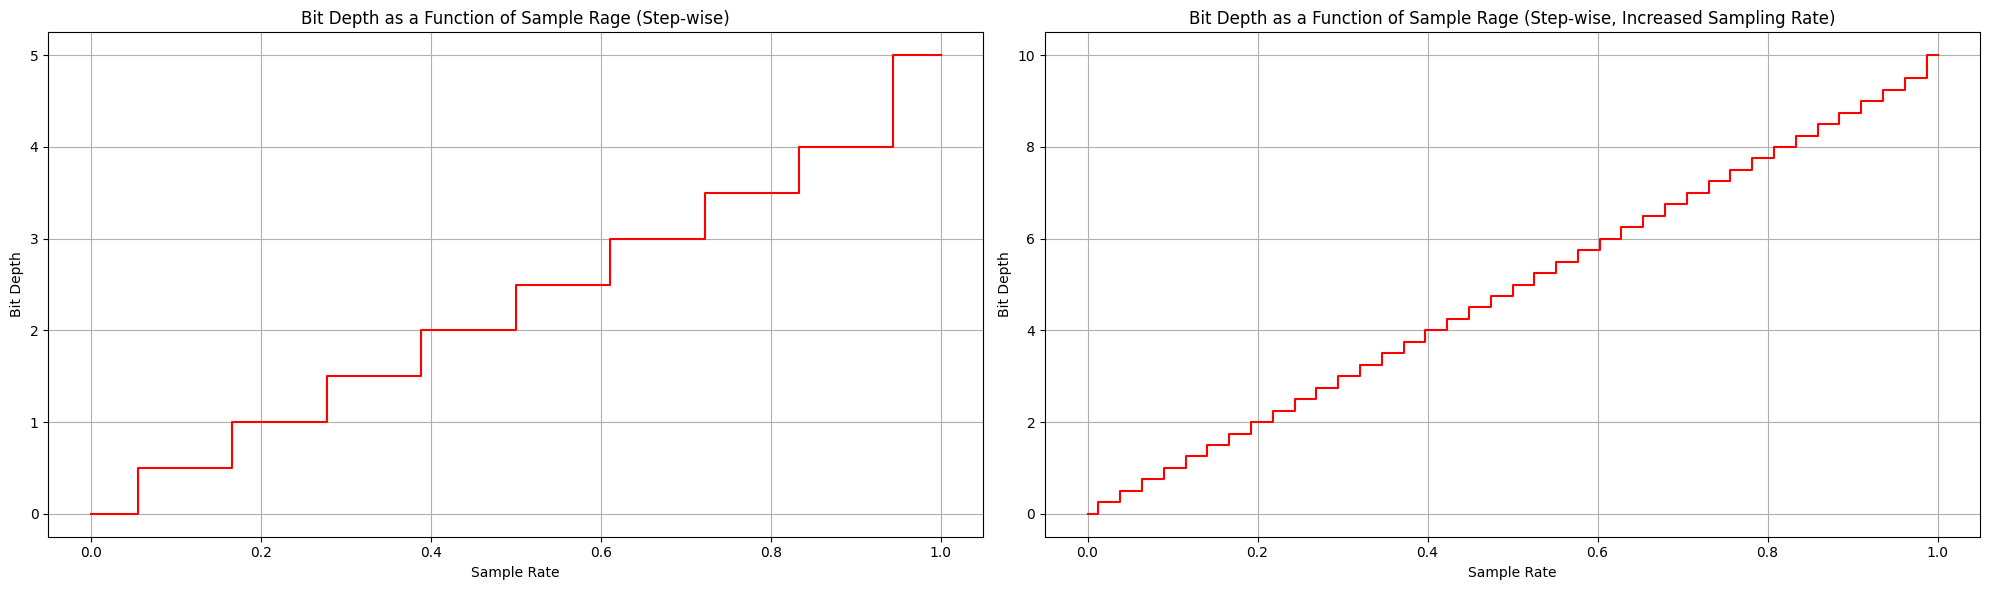

In [6]:
x_steps_1 = np.linspace(0,1,10)
y_steps_1 = np.floor(np.linspace(0,1,10) * 10) / 2

x_steps_2 = np.linspace(0,1,40)
y_steps_2 = np.floor(np.linspace(0,1,40) * 40) / 4

plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.step(x_steps_1, y_steps_1, where='mid', label='Step-wise Change', color='red')
plt.title("Bit Depth as a Function of Sample Rage (Step-wise)")
plt.xlabel('Sample Rate')
plt.ylabel('Bit Depth')
plt.grid(True)

plt.subplot(1,2,2)
plt.step(x_steps_2, y_steps_2, where='mid', label='Step-wise Change', color='red')
plt.title("Bit Depth as a Function of Sample Rage (Step-wise, Increased Sampling Rate)")
plt.xlabel('Sample Rate')
plt.ylabel('Bit Depth')
plt.grid(True)

plt.tight_layout()
plt.show()


###

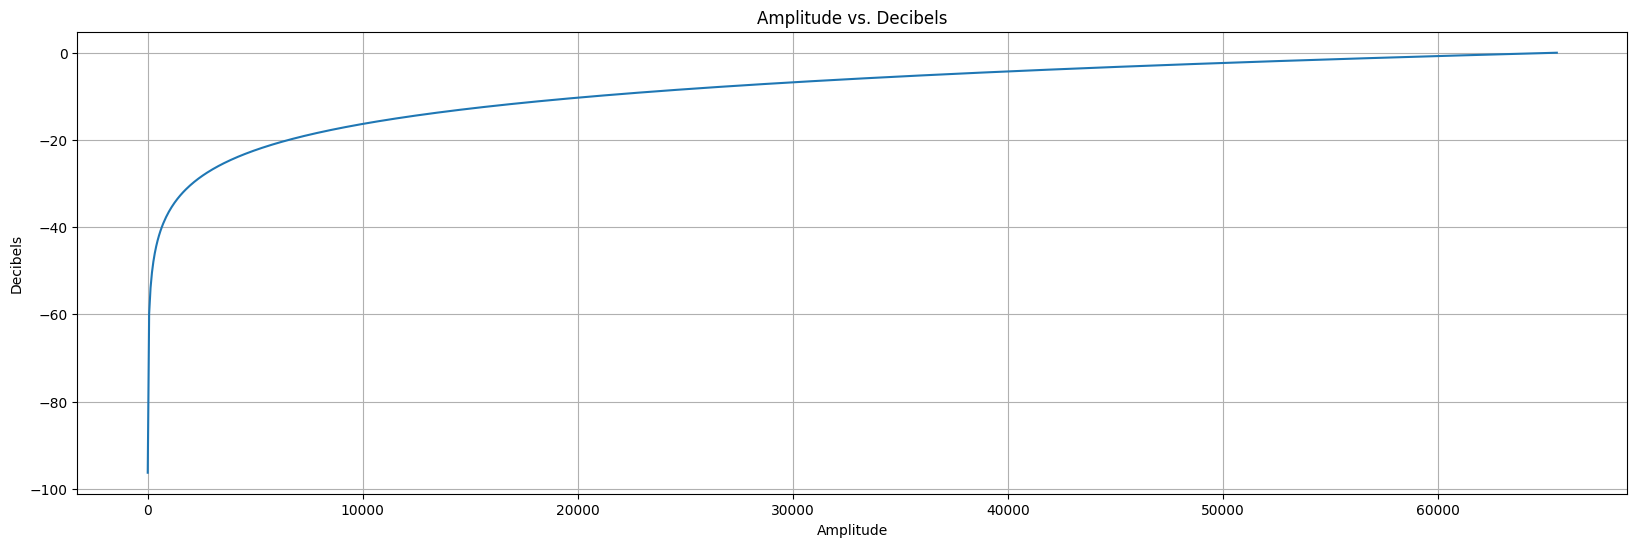

In [8]:
max_amplitude = 2**16 -1

amplitudes = np.linspace(1, max_amplitude, 1000)

decibels = 20 * np.log10(amplitudes / max_amplitude)

plt.figure(figsize=(20, 6))
plt.plot(amplitudes, decibels, label="Decibel Level")
plt.title("Amplitude vs. Decibels")
plt.xlabel('Amplitude')
plt.ylabel('Decibels')
plt.grid(True)
plt.show()


In [9]:
dataset = torchaudio.datasets.LIBRISPEECH(
    root="./",
    url="test-clean",
    download=True
)

100%|██████████| 331M/331M [00:16<00:00, 20.6MB/s]


In [10]:
dataset[2]

(tensor([[ 0.0004,  0.0006,  0.0008,  ..., -0.0001, -0.0004, -0.0007]]),
 16000,
 'AFTER EARLY NIGHTFALL THE YELLOW LAMPS WOULD LIGHT UP HERE AND THERE THE SQUALID QUARTER OF THE BROTHELS',
 1089,
 134686,
 2)

In [11]:
audio_data = dataset[2][0][0]
sr = dataset[2][1]

print(audio_data.shape, sr)
print('length: ', len(audio_data))
print('duration: ', len(audio_data) / sr)

ipd.Audio(audio_data, rate=sr)



torch.Size([106000]) 16000
length:  106000
duration:  6.625


In [14]:
audio_np = audio_data.numpy()
y_8k = librosa.resample(audio_np, orig_sr=sr, target_sr=8000)

ipd.Audio(y_8k, rate=8000)

In [15]:

y_4k = librosa.resample(audio_np, orig_sr=sr, target_sr=4000)

ipd.Audio(y_4k, rate=4000)

In [16]:
bit = 8
max_value = 2**bit - 1

quantized_4_wav = audio_np / max_value * max_value
quantized_4_wav = np.round(quantized_4_wav).astype(int)
quantized_4_wav = np.clip(quantized_4_wav, -max_value, max_value)

ipd.Audio(quantized_4_wav, rate=sr)

### 오디오 신호 시각화

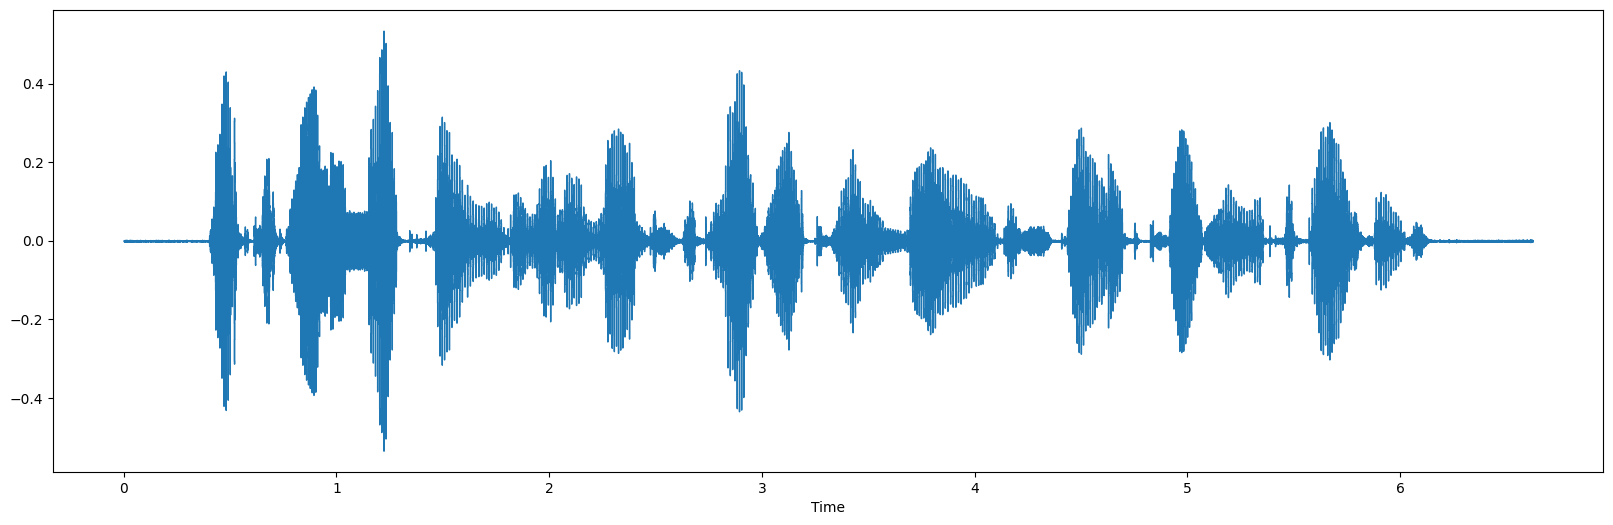

In [18]:
fig = plt.figure(figsize=(20, 6))
librosa.display.waveshow(audio_np, sr=sr)
plt.show()

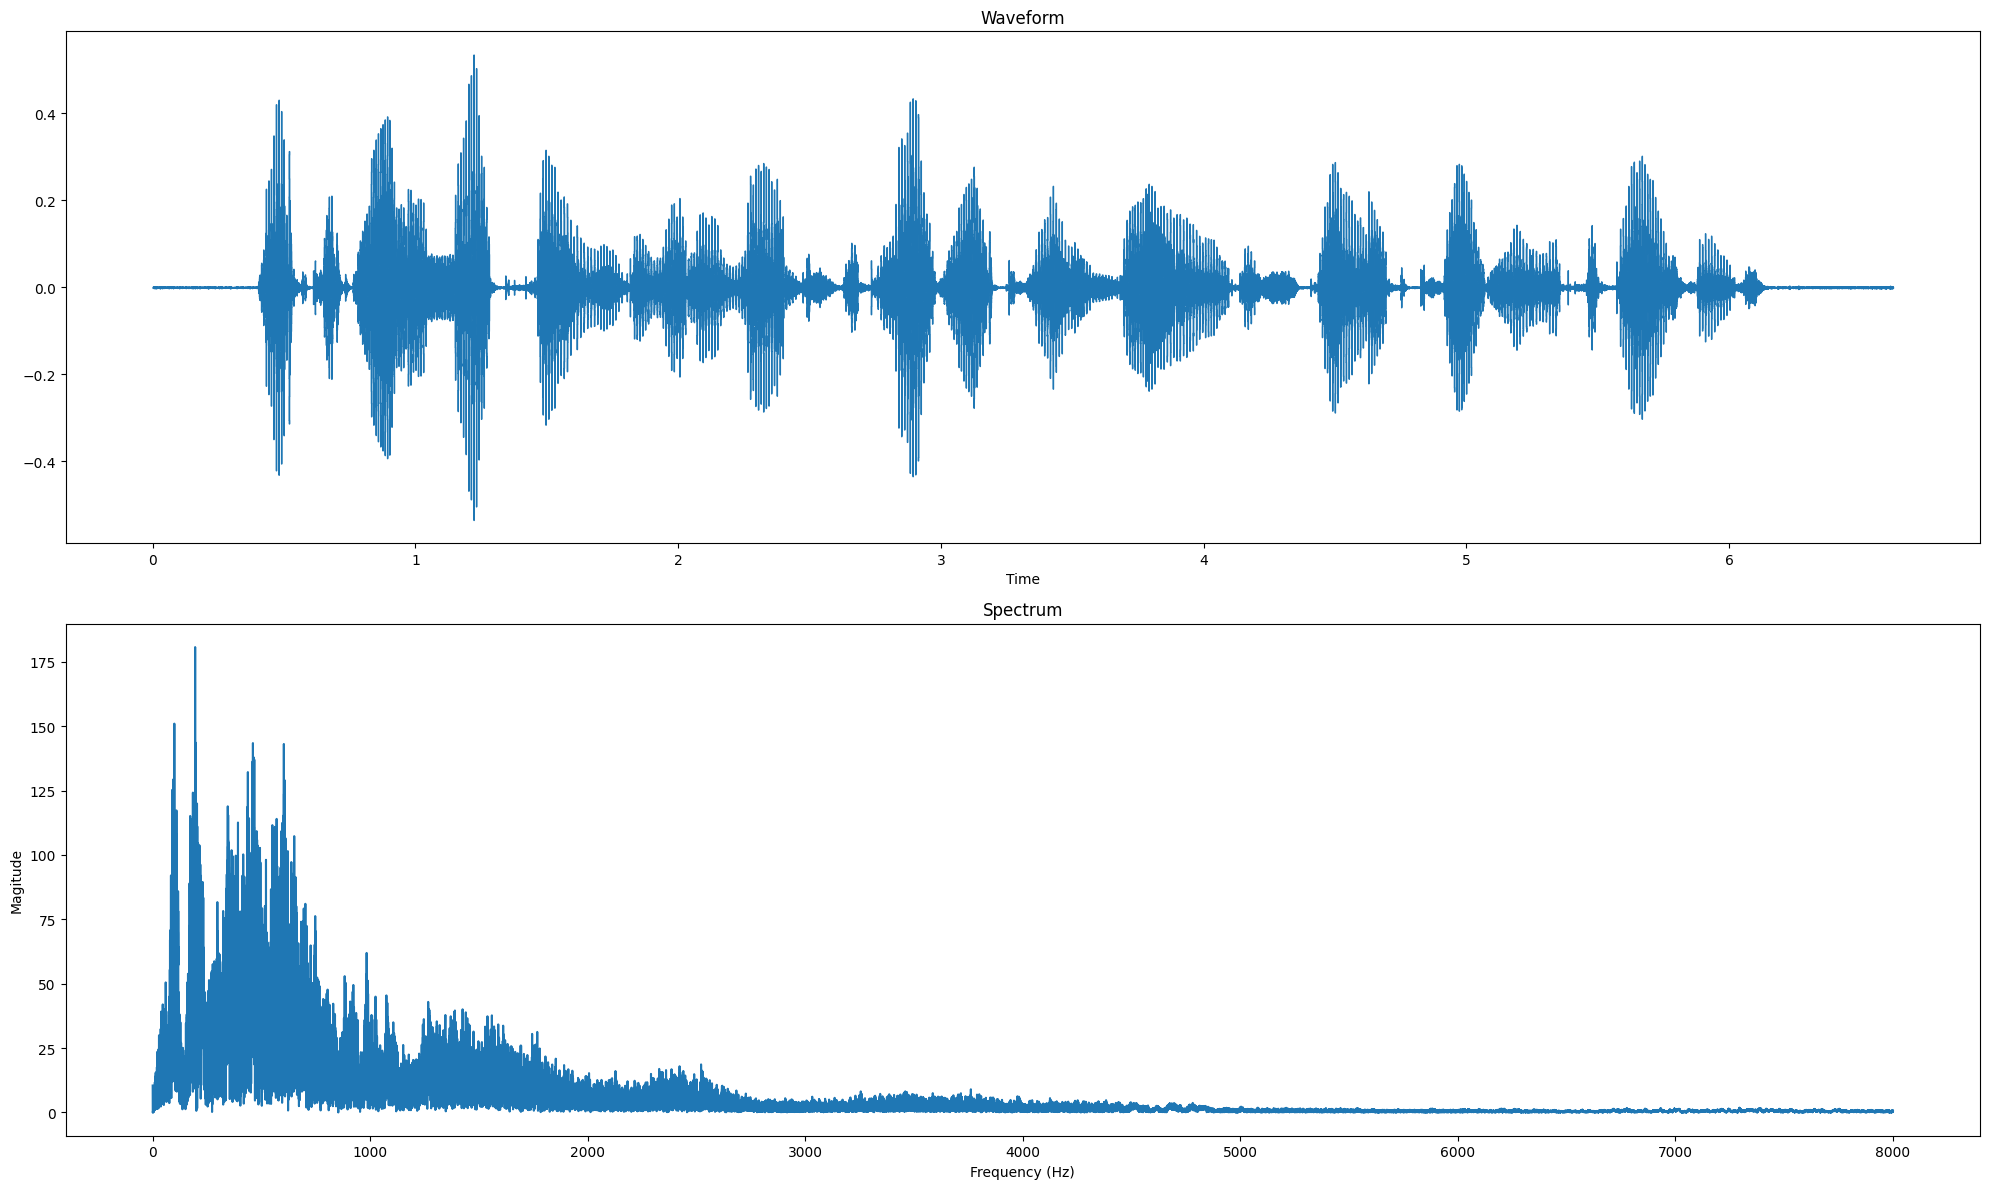

In [20]:
fft_result = np.fft.fft(audio_np)
fft_magnitude = np.abs(fft_result)

frequency = np.linspace(0, sr, len(fft_magnitude))

fig, ax = plt.subplots(2, 1, figsize=(20, 12))

librosa.display.waveshow(audio_np, sr=sr, ax=ax[0])
ax[0].set_title('Waveform')

ax[1].plot(frequency[:len(frequency)//2], fft_magnitude[:len(frequency)//2])
ax[1].set_title('Spectrum')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magitude')

plt.tight_layout()
plt.show()
